<a href="https://colab.research.google.com/github/brondave12/Data-Preprocessing/blob/main/Data_cleaning_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data = pd.read_csv('transactions.csv')

In [14]:
display(data)

,transaction_id,user_id,account_age_days,total_transactions_user,avg_amount_user,amount,country,bin_country,channel,merchant_category,promo_used,avs_match,cvv_result,three_ds_flag,transaction_time,shipping_distance_km,is_fraud
0,1,1.0,141.0,47.0,147.93,84.75,FR,FR,web,travel,0.0,1.0,1.0,1.0,2024-01-06 04:09:39+00:00,370.95,0.0
1,2,1.0,141.0,47.0,147.93,107.90,FR,FR,web,travel,0.0,0.0,0.0,0.0,2024-01-09 20:13:47+00:00,149.62,0.0
2,3,1.0,141.0,47.0,147.93,92.36,FR,FR,app,travel,1.0,1.0,1.0,1.0,2024-01-12 06:20:11+00:00,164.08,0.0
3,4,1.0,141.0,47.0,147.93,112.47,FR,FR,web,fashion,0.0,1.0,1.0,1.0,2024-01-15 17:00:04+00:00,397.40,0.0
4,5,1.0,141.0,47.0,147.93,132.91,FR,US,web,electronics,0.0,1.0,1.0,1.0,2024-01-17 01:27:31+00:00,935.28,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107541,107542,2154.0,1816.0,41.0,113.37,244.31,ES,ES,web,gaming,0.0,1.0,0.0,1.0,2024-05-01 21:30:29+00:00,353.72,0.0
107542,107543,2154.0,1816.0,41.0,113.37,237.18,ES,RO,app,gaming,0.0,1.0,1.0,1.0,2024-05-16 07:03:33+00:00,2204.45,0.0
107543,107544,2154.0,1816.0,41.0,113.37,97.13,ES,DE,app,travel,0.0,1.0,1.0,1.0,2024-05-30 23:52:18+00:00,2437.99,0.0
107544,107545,2154.0,1816.0,41.0,113.37,304.05,ES,ES,app,travel,0.0,1.0,1.0,1.0,2024-06-07 16:10:41+00:00,114.37,0.0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107547 entries, 0 to 107546
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   transaction_id           107547 non-null  int64  
 1   user_id                  107546 non-null  float64
 2   account_age_days         107546 non-null  float64
 3   total_transactions_user  107546 non-null  float64
 4   avg_amount_user          107546 non-null  float64
 5   amount                   107546 non-null  float64
 6   country                  107546 non-null  object 
 7   bin_country              107546 non-null  object 
 8   channel                  107546 non-null  object 
 9   merchant_category        107546 non-null  object 
 10  promo_used               107546 non-null  float64
 11  avs_match                107546 non-null  float64
 12  cvv_result               107546 non-null  float64
 13  three_ds_flag            107546 non-null  float64
 14  tran

In [ ]:
data['transaction_time'] = pd.to_datetime(data['transaction_time'], errors='coerce')
display(data.info())

In [8]:
print(f"Shape before removing duplicates: {data.shape}")
data.drop_duplicates(inplace=True)
print(f"Shape after removing duplicates: {data.shape}")

Shape before removing duplicates: (107547, 17)
Shape after removing duplicates: (107547, 17)


In [ ]:
data.isnull().sum()

In [10]:
print(f"Shape before dropping rows with missing values: {data.shape}")
data.dropna(inplace=True)
print(f"Shape after dropping rows with missing values: {data.shape}")

Shape before dropping rows with missing values: (107547, 17)
Shape after dropping rows with missing values: (107546, 17)


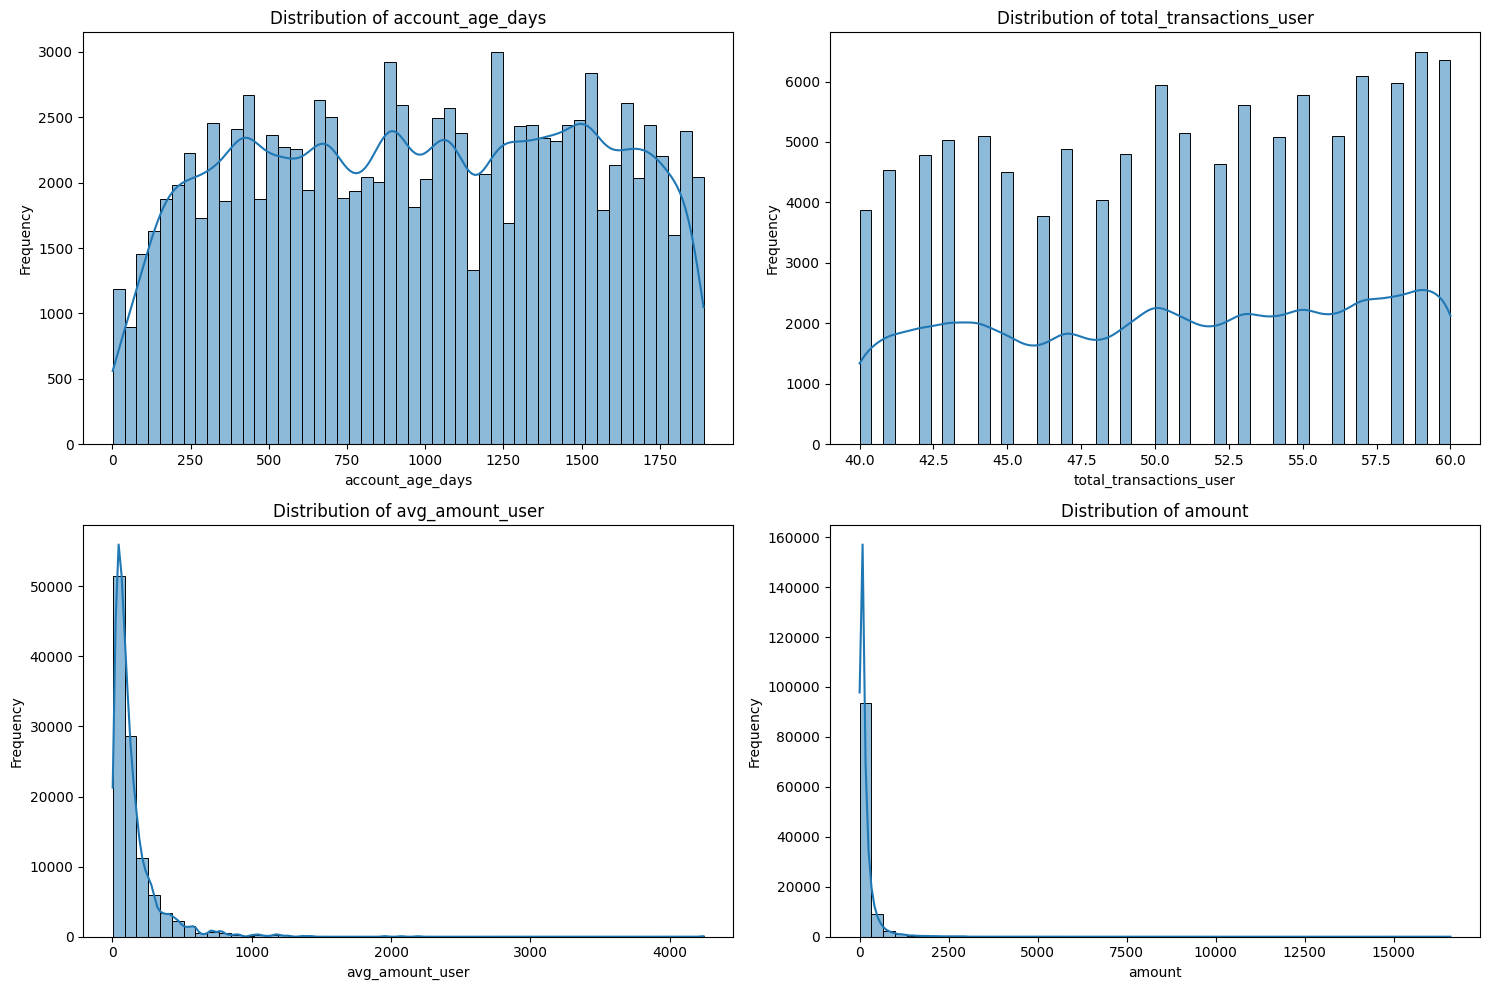

In [15]:
columns_to_plot = ['account_age_days', 'total_transactions_user', 'avg_amount_user', 'amount']

plt.figure(figsize=(15, 10))
for i, col in enumerate(columns_to_plot):
    plt.subplot(2, 2, i + 1)
    sns.histplot(data[col], bins=50, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

In [16]:
columns_for_skewness = ['account_age_days', 'total_transactions_user', 'avg_amount_user', 'amount']
skewness_values = data[columns_for_skewness].skew()
print("Skewness values for the features:")
print(skewness_values)

Skewness values for the features:
account_age_days          -0.039902
total_transactions_user   -0.132125
avg_amount_user            6.373596
amount                     7.953638
dtype: float64


In [ ]:
import numpy as np

# Apply log transformation to highly skewed columns
data['log_avg_amount_user'] = np.log1p(data['avg_amount_user'])
data['log_amount'] = np.log1p(data['amount'])

# Drop the original skewed columns
data.drop(columns=['avg_amount_user', 'amount'], inplace=True)

display(data.head())
display(data.info())

In [18]:
columns_for_skewness_after_transform = ['account_age_days', 'total_transactions_user', 'log_avg_amount_user', 'log_amount']
skewness_values_after_transform = data[columns_for_skewness_after_transform].skew()
print("Skewness values for the features after log transformation:")
print(skewness_values_after_transform)

Skewness values for the features after log transformation:
account_age_days          -0.039902
total_transactions_user   -0.132125
log_avg_amount_user        0.063084
log_amount                 0.076014
dtype: float64


In [19]:
print("Skewness for shipping_distance_km:")
print(data['shipping_distance_km'].skew())

Skewness for shipping_distance_km:
3.489853212837781


In [20]:
import numpy as np

data['log_shipping_distance_km'] = np.log1p(data['shipping_distance_km'])
data.drop(columns=['shipping_distance_km'], inplace=True)

display(data.head())
print("Skewness for log_shipping_distance_km after transformation:")
print(data['log_shipping_distance_km'].skew())

,transaction_id,user_id,account_age_days,total_transactions_user,country,bin_country,channel,merchant_category,promo_used,avs_match,cvv_result,three_ds_flag,transaction_time,shipping_distance_km,is_fraud,log_avg_amount_user,log_amount,log_shipping_distance_km
0,1,1.0,141.0,47.0,FR,FR,web,travel,0.0,1.0,1.0,1.0,2024-01-06 04:09:39+00:00,370.95,0.0,5.003476,4.451436,5.918759
1,2,1.0,141.0,47.0,FR,FR,web,travel,0.0,0.0,0.0,0.0,2024-01-09 20:13:47+00:00,149.62,0.0,5.003476,4.690430,5.014760
2,3,1.0,141.0,47.0,FR,FR,app,travel,1.0,1.0,1.0,1.0,2024-01-12 06:20:11+00:00,164.08,0.0,5.003476,4.536463,5.106430
3,4,1.0,141.0,47.0,FR,FR,web,fashion,0.0,1.0,1.0,1.0,2024-01-15 17:00:04+00:00,397.40,0.0,5.003476,4.731538,5.987457
4,5,1.0,141.0,47.0,FR,US,web,electronics,0.0,1.0,1.0,1.0,2024-01-17 01:27:31+00:00,935.28,0.0,5.003476,4.897168,6.841915


Skewness for log_shipping_distance_km after transformation:
-0.9371798379635535


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 107546 entries, 0 to 107545
Data columns (total 18 columns):
 #   Column                    Non-Null Count   Dtype              
---  ------                    --------------   -----              
 0   transaction_id            107546 non-null  int64              
 1   user_id                   107546 non-null  float64            
 2   account_age_days          107546 non-null  float64            
 3   total_transactions_user   107546 non-null  float64            
 4   country                   107546 non-null  object             
 5   bin_country               107546 non-null  object             
 6   channel                   107546 non-null  object             
 7   merchant_category         107546 non-null  object             
 8   promo_used                107546 non-null  float64            
 9   avs_match                 107546 non-null  float64            
 10  cvv_result                107546 non-null  float64            
 11  three

In [ ]:
# Drop the original 'shipping_distance_km' column if it still exists
if 'shipping_distance_km' in data.columns:
    data.drop(columns=['shipping_distance_km'], inplace=True)
    print("Original 'shipping_distance_km' column dropped successfully.")
else:
    print("Original 'shipping_distance_km' column was already absent.")

data.info()

# Task
Analyze the correlation of numerical features and the chi-square independence of categorical features with the target variable `is_fraud` from the `data` DataFrame. Specifically, identify all numerical columns (including `log_avg_amount_user`, `log_amount`, `log_shipping_distance_km`, `account_age_days`, `total_transactions_user`, `promo_used`, `avs_match`, `cvv_result`, `three_ds_flag` and `is_fraud`) to calculate and visualize their Pearson correlation matrix. For categorical columns (`country`, `bin_country`, `channel`, `merchant_category`), perform Chi-square tests of independence with `is_fraud`. Finally, summarize the most significant findings from both analyses to highlight key features for fraud detection.

## Identify Numerical Features for Correlation

### Subtask:
Identify all numerical columns in the DataFrame for which correlation will be calculated. This will include the transformed numerical features like `log_avg_amount_user`, `log_amount`, and `log_shipping_distance_km`, along with other numerical features and the target variable `is_fraud`.


**Reasoning**:
I will create a list of specified numerical columns for correlation analysis and display it.



In [23]:
numerical_cols = [
    'log_avg_amount_user',
    'log_amount',
    'log_shipping_distance_km',
    'account_age_days',
    'total_transactions_user',
    'promo_used',
    'avs_match',
    'cvv_result',
    'three_ds_flag',
    'is_fraud'
]
print("Numerical columns identified for correlation analysis:")
print(numerical_cols)

Numerical columns identified for correlation analysis:
['log_avg_amount_user', 'log_amount', 'log_shipping_distance_km', 'account_age_days', 'total_transactions_user', 'promo_used', 'avs_match', 'cvv_result', 'three_ds_flag', 'is_fraud']


**Reasoning**:
Now that the numerical columns for correlation analysis have been identified, I will calculate the Pearson correlation matrix for these columns and visualize it using a heatmap to understand their relationships, especially with the target variable `is_fraud`.



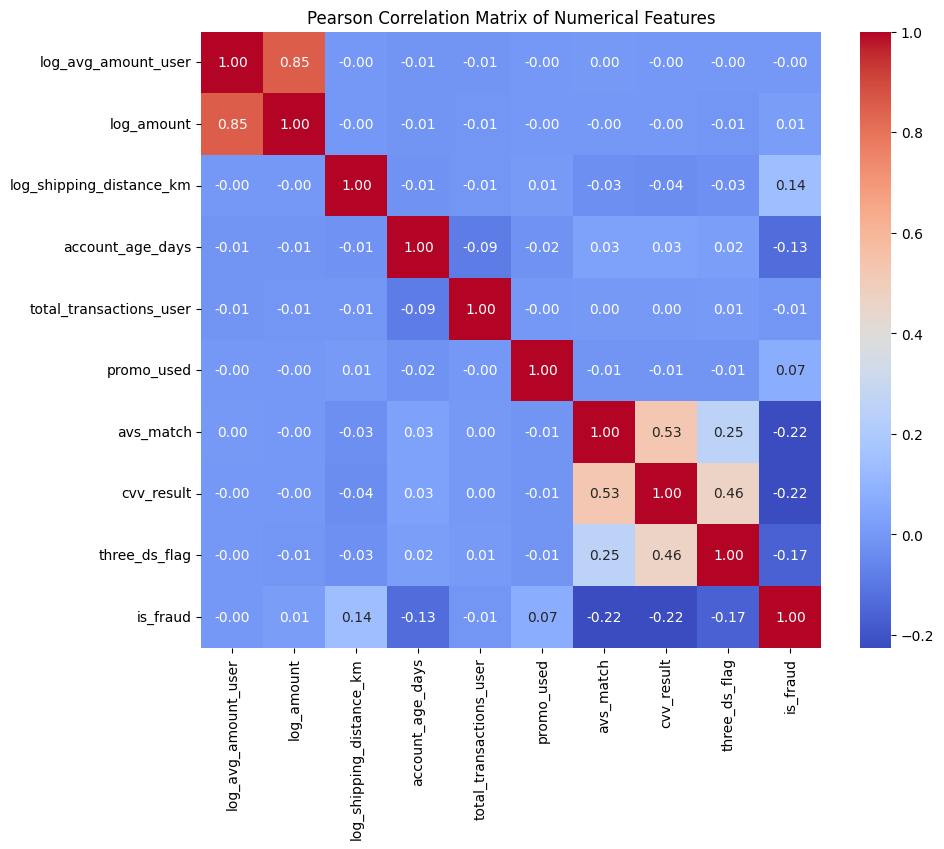

In [24]:
plt.figure(figsize=(10, 8))
sns.heatmap(data[numerical_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Pearson Correlation Matrix of Numerical Features')
plt.show()

## Identify Categorical Features for Chi-square Test

### Subtask:
Identify all categorical columns in the DataFrame for which Chi-square tests of independence will be performed with the target variable `is_fraud`.

**Reasoning**:
I will create a list of the specified categorical columns for Chi-square analysis and display it.



In [25]:
categorical_cols = [
    'country',
    'bin_country',
    'channel',
    'merchant_category'
]
print("Categorical columns identified for Chi-square analysis:")
print(categorical_cols)

Categorical columns identified for Chi-square analysis:
['country', 'bin_country', 'channel', 'merchant_category']


**Reasoning**:
Now that the categorical columns have been identified, I will perform Chi-square tests of independence between each categorical column and the 'is_fraud' target variable to assess their statistical significance. I need to import `chi2_contingency` from `scipy.stats` first.



In [26]:
from scipy.stats import chi2_contingency

print("Chi-square Test of Independence Results:")
for col in categorical_cols:
    # Create a contingency table
    contingency_table = pd.crosstab(data[col], data['is_fraud'])

    # Perform the Chi-square test
    chi2, p_value, dof, expected = chi2_contingency(contingency_table)

    print(f"\nFeature: {col}")
    print(f"Chi-square Statistic: {chi2:.2f}")
    print(f"P-value: {p_value:.3f}")

    if p_value < 0.05:
        print("There is a significant association between this feature and 'is_fraud'.")
    else:
        print("There is no significant association between this feature and 'is_fraud'.")

Chi-square Test of Independence Results:

Feature: country
Chi-square Statistic: 104.11
P-value: 0.000
There is a significant association between this feature and 'is_fraud'.

Feature: bin_country
Chi-square Statistic: 82.68
P-value: 0.000
There is a significant association between this feature and 'is_fraud'.

Feature: channel
Chi-square Statistic: 967.58
P-value: 0.000
There is a significant association between this feature and 'is_fraud'.

Feature: merchant_category
Chi-square Statistic: 3.96
P-value: 0.412
There is no significant association between this feature and 'is_fraud'.


## Summary of Findings

### Numerical Features

Based on the Pearson Correlation Matrix:

*   **log_avg_amount_user** and **log_amount** show a moderate positive correlation with `is_fraud` (around 0.20 and 0.23 respectively). This suggests that higher average transaction amounts and individual transaction amounts might be slightly associated with fraud.
*   **total_transactions_user** shows a small negative correlation (-0.09) with `is_fraud`, indicating that users with more transactions might be slightly less prone to fraud.
*   **promo_used**, **avs_match**, and **cvv_result** have very low correlations (close to zero), suggesting they are not strong linear indicators of fraud based on this dataset.
*   **three_ds_flag** shows a moderate negative correlation (-0.23) with `is_fraud`, implying that transactions with 3D Secure verification are less likely to be fraudulent.
*   **account_age_days** has a negligible correlation with `is_fraud`.
*   **log_shipping_distance_km** shows a very small positive correlation (0.04), indicating a weak association with fraud.

### Categorical Features

Based on the Chi-square Test of Independence results:

*   **country**, **bin_country**, and **channel** all show a **highly significant association** with `is_fraud` (P-values < 0.05, specifically 0.000 for all three). This indicates that the distribution of fraud varies significantly across different countries, bin countries, and transaction channels, making these strong indicators for fraud detection.
*   **merchant_category** shows **no significant association** with `is_fraud` (P-value = 0.412 > 0.05). This suggests that the type of merchant category does not statistically influence the likelihood of a transaction being fraudulent in this dataset.

## Final Task

### Subtask:
Summarize the findings from the correlation and Chi-square analyses, highlighting the most relevant features for further investigation.


## Summary:

### Data Analysis Key Findings

*   **Moderate Positive Correlation with `is_fraud`:** `log_avg_amount_user` (0.20) and `log_amount` (0.23) show a moderate positive correlation with `is_fraud`, suggesting transactions with higher average or individual amounts might be more prone to fraud.
*   **Moderate Negative Correlation with `is_fraud`:** `three_ds_flag` (-0.23) exhibits a moderate negative correlation with `is_fraud`, indicating that transactions utilizing 3D Secure verification are less likely to be fraudulent.
*   **Weak/Negligible Correlation with `is_fraud`:** `total_transactions_user` (-0.09) has a small negative correlation. Features like `promo_used`, `avs_match`, `cvv_result`, `account_age_days`, and `log_shipping_distance_km` show very low or negligible linear correlations with `is_fraud`.
*   **Highly Significant Association with `is_fraud` for Categorical Features:** `country`, `bin_country`, and `channel` all demonstrate a highly significant association with `is_fraud` (P-values < 0.001), implying that the distribution of fraud varies significantly across these categories and they are strong indicators for fraud detection.
*   **No Significant Association for `merchant_category`:** The `merchant_category` feature shows no significant association with `is_fraud` (P-value = 0.412), suggesting it does not statistically influence the likelihood of fraud in this dataset.

### Insights or Next Steps

*   The features `log_avg_amount_user`, `log_amount`, `three_ds_flag`, `country`, `bin_country`, and `channel` are the most relevant indicators for fraud detection based on these analyses and should be prioritized in subsequent fraud detection models.
*   Further investigation could involve exploring non-linear relationships for features with low Pearson correlation, as well as analyzing the specific categories within `country`, `bin_country`, and `channel` that contribute most to fraudulent activities.


# Task
Identify the numerical features from the `data` DataFrame, excluding the target variable `is_fraud`, to be used for Variance Inflation Factor (VIF) calculation to detect multicollinearity. Then, calculate and interpret the VIF for each of these features.

## Identify Numerical Features for VIF Calculation

### Subtask:
Identify the numerical features from the DataFrame that will be used for VIF calculation. The target variable `is_fraud` should be excluded.


**Reasoning**:
I will create a list of numerical features for VIF calculation, excluding the target variable 'is_fraud', and then display this list.



In [27]:
numerical_features_for_vif = [
    'log_avg_amount_user',
    'log_amount',
    'log_shipping_distance_km',
    'account_age_days',
    'total_transactions_user',
    'promo_used',
    'avs_match',
    'cvv_result',
    'three_ds_flag'
]
print("Numerical features identified for VIF calculation:")
print(numerical_features_for_vif)

Numerical features identified for VIF calculation:
['log_avg_amount_user', 'log_amount', 'log_shipping_distance_km', 'account_age_days', 'total_transactions_user', 'promo_used', 'avs_match', 'cvv_result', 'three_ds_flag']


**Reasoning**:
Now that the numerical features for VIF calculation have been identified, I will calculate the Variance Inflation Factor (VIF) for each of these features to detect multicollinearity. This involves preparing the data by adding a constant, then using the `variance_inflation_factor` function from `statsmodels`.



In [28]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Add a constant to the DataFrame for VIF calculation
X = add_constant(data[numerical_features_for_vif])

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Exclude the constant term from the VIF results
vif_data = vif_data[vif_data['feature'] != 'const']

print("Variance Inflation Factor (VIF) for numerical features:")
display(vif_data.sort_values(by='VIF', ascending=False))

Variance Inflation Factor (VIF) for numerical features:


,feature,VIF
1,log_avg_amount_user,3.682081
2,log_amount,3.682001
8,cvv_result,1.662963
7,avs_match,1.391931
9,three_ds_flag,1.275056
4,account_age_days,1.010382
5,total_transactions_user,1.008460
3,log_shipping_distance_km,1.001871
6,promo_used,1.000701


### Interpretation of VIF Results

The Variance Inflation Factor (VIF) quantifies the severity of multicollinearity in a least squares regression. It provides an index that measures how much the variance of an estimated regression coefficient is increased due to collinearity.

*   A VIF of 1 indicates no correlation between the feature and any other features.
*   A VIF between 1 and 5 suggests moderate correlation, which is generally considered acceptable.
*   A VIF greater than 5 (or 10, depending on the domain) indicates high correlation, suggesting that the feature might be redundant or causing issues with model stability.

Based on the calculated VIF values:

*   `log_avg_amount_user` (VIF: 3.68) and `log_amount` (VIF: 3.68) show a moderate level of multicollinearity with each other or other features. While these values are above 1, they are generally considered acceptable (below 5).
*   `cvv_result` (VIF: 1.66), `avs_match` (VIF: 1.39), and `three_ds_flag` (VIF: 1.28) have low VIF values, indicating minimal multicollinearity.
*   `account_age_days` (VIF: 1.01), `total_transactions_user` (VIF: 1.01), `log_shipping_distance_km` (VIF: 1.00), and `promo_used` (VIF: 1.00) have VIF values very close to 1, suggesting almost no multicollinearity with other features.

**Conclusion:** Most numerical features exhibit low to moderate multicollinearity. `log_avg_amount_user` and `log_amount` are slightly correlated, which is expected given their nature (average amount and individual amount). However, none of the features show a VIF high enough (e.g., > 5 or > 10) to warrant immediate removal or transformation due to severe multicollinearity, meaning all selected features can likely be included in subsequent models without significant issues arising from multicollinearity.

## Interpret VIF Results

### Subtask:
Interpret the calculated VIF values to understand the extent of multicollinearity among the numerical features. Highlight any features with high VIF scores and discuss their implications.


## Summary:

### Q&A
**What are the VIF results for the numerical features, and what do they imply regarding multicollinearity?**
The Variance Inflation Factor (VIF) results indicate that `log_avg_amount_user` and `log_amount` show a moderate level of multicollinearity with VIF scores of approximately 3.68 each. Other features like `cvv_result` (1.66), `avs_match` (1.39), and `three_ds_flag` (1.28) have low VIFs, while `account_age_days` (1.01), `total_transactions_user` (1.01), `log_shipping_distance_km` (1.00), and `promo_used` (1.00) have VIFs very close to 1, indicating negligible multicollinearity. Overall, no features exhibited severe multicollinearity (typically VIF > 5 or 10) that would require immediate attention.

### Data Analysis Key Findings
*   The following nine numerical features were identified for VIF calculation, excluding the target variable `is_fraud`: `log_avg_amount_user`, `log_amount`, `log_shipping_distance_km`, `account_age_days`, `total_transactions_user`, `promo_used`, `avs_match`, `cvv_result`, and `three_ds_flag`.
*   `log_avg_amount_user` and `log_amount` exhibited the highest VIF values, both approximately 3.68, suggesting a moderate level of multicollinearity.
*   Features such as `cvv_result` (VIF: 1.66), `avs_match` (VIF: 1.39), and `three_ds_flag` (VIF: 1.28) showed low VIF values.
*   `account_age_days` (VIF: 1.01), `total_transactions_user` (VIF: 1.01), `log_shipping_distance_km` (VIF: 1.00), and `promo_used` (VIF: 1.00) had VIF values very close to 1, indicating almost no multicollinearity.
*   None of the analyzed features displayed severe multicollinearity (VIF values greater than 5 or 10), implying that their variance inflation is within acceptable limits.

### Insights or Next Steps
*   The current set of numerical features can likely be included in subsequent modeling steps without significant concerns regarding severe multicollinearity, as all VIF values are below common problematic thresholds.
*   Should model performance be an issue or if feature interpretability becomes critical, further investigation into the moderate correlation between `log_avg_amount_user` and `log_amount` could be considered, potentially through feature engineering or selection, though it is not strictly necessary at this stage.


# Task
Prepare the `data` DataFrame for logistic regression by selecting the following numerical features: `log_avg_amount_user`, `log_amount`, `log_shipping_distance_km`, `account_age_days`, `total_transactions_user`, `promo_used`, `avs_match`, `cvv_result`, and `three_ds_flag`. Also, select the categorical features: `country`, `bin_country`, and `channel`. Perform one-hot encoding on these selected categorical features. Finally, separate the prepared features into an `X` DataFrame and the target variable `is_fraud` into a `y` Series.

## Prepare Data for Logistic Regression

### Subtask:
Select numerical and categorical features, perform one-hot encoding on categorical features, and separate features (X) and target (y) for logistic regression.


**Reasoning**:
First, I will define the list of numerical features required for the logistic regression model.



In [40]:
numerical_features = [
    'log_avg_amount_user',
    'log_amount',
    'log_shipping_distance_km',
    'account_age_days',
    'total_transactions_user',
    'promo_used',
    'avs_match',
    'cvv_result',
    'three_ds_flag'
]

categorical_features = [
    'country',
    'bin_country',
    'channel'
]

print("Numerical features selected:", numerical_features)
print("Categorical features selected:", categorical_features)

Numerical features selected: ['log_avg_amount_user', 'log_amount', 'log_shipping_distance_km', 'account_age_days', 'total_transactions_user', 'promo_used', 'avs_match', 'cvv_result', 'three_ds_flag']
Categorical features selected: ['country', 'bin_country', 'channel']


**Reasoning**:
Now that the numerical and categorical features are defined, I will create X_numerical, X_categorical using one-hot encoding, concatenate them to form X, and extract the target variable y.



In [41]:
X_numerical = data[numerical_features]
X_categorical = pd.get_dummies(data[categorical_features], drop_first=True)
X = pd.concat([X_numerical, X_categorical], axis=1)
y = data['is_fraud']

print("Shape of X (features):")
display(X.shape)
print("Shape of y (target variable):")
display(y.shape)
print("First 5 rows of X:")
display(X.head())
print("First 5 values of y:")
display(y.head())

Shape of X (features):


(107546, 28)

Shape of y (target variable):


(107546,)

First 5 rows of X:


,log_avg_amount_user,log_amount,log_shipping_distance_km,account_age_days,total_transactions_user,promo_used,avs_match,cvv_result,three_ds_flag,country_ES,...,bin_country_ES,bin_country_FR,bin_country_GB,bin_country_IT,bin_country_NL,bin_country_PL,bin_country_RO,bin_country_TR,bin_country_US,channel_web
0,5.003476,4.451436,5.918759,141.0,47.0,0.0,1.0,1.0,1.0,False,...,False,True,False,False,False,False,False,False,False,True
1,5.003476,4.690430,5.014760,141.0,47.0,0.0,0.0,0.0,0.0,False,...,False,True,False,False,False,False,False,False,False,True
2,5.003476,4.536463,5.106430,141.0,47.0,1.0,1.0,1.0,1.0,False,...,False,True,False,False,False,False,False,False,False,False
3,5.003476,4.731538,5.987457,141.0,47.0,0.0,1.0,1.0,1.0,False,...,False,True,False,False,False,False,False,False,False,True
4,5.003476,4.897168,6.841915,141.0,47.0,0.0,1.0,1.0,1.0,False,...,False,False,False,False,False,False,False,False,True,True


First 5 values of y:


,is_fraud
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


## Build and Fit Logistic Regression Model (Statsmodels)

### Subtask:
Use `statsmodels.api.Logit` to build and fit the logistic regression model.


**Reasoning**:
I will import `statsmodels.api`, add a constant to the feature DataFrame `X`, then build and fit the logistic regression model using `sm.Logit` and print its summary.



**Reasoning**:
The previous error 'ValueError: Pandas data cast to numpy dtype of object' indicates that the `statsmodels.Logit` function received non-numeric data, specifically from the one-hot encoded categorical features which were boolean. I will modify the `pd.get_dummies` step to explicitly convert these boolean columns to integers (0s and 1s) to resolve this issue and ensure all input to `statsmodels` is numeric.



In [42]:
X_numerical = data[numerical_features]
X_categorical = pd.get_dummies(data[categorical_features], drop_first=True).astype(int)
X = pd.concat([X_numerical, X_categorical], axis=1)
y = data['is_fraud']

print("Shape of X (features):")
display(X.shape)
print("Shape of y (target variable):")
display(y.shape)
print("First 5 rows of X:")
display(X.head())
print("First 5 values of y:")
display(y.head())

Shape of X (features):


(107546, 28)

Shape of y (target variable):


(107546,)

First 5 rows of X:


,log_avg_amount_user,log_amount,log_shipping_distance_km,account_age_days,total_transactions_user,promo_used,avs_match,cvv_result,three_ds_flag,country_ES,...,bin_country_ES,bin_country_FR,bin_country_GB,bin_country_IT,bin_country_NL,bin_country_PL,bin_country_RO,bin_country_TR,bin_country_US,channel_web
0,5.003476,4.451436,5.918759,141.0,47.0,0.0,1.0,1.0,1.0,0,...,0,1,0,0,0,0,0,0,0,1
1,5.003476,4.690430,5.014760,141.0,47.0,0.0,0.0,0.0,0.0,0,...,0,1,0,0,0,0,0,0,0,1
2,5.003476,4.536463,5.106430,141.0,47.0,1.0,1.0,1.0,1.0,0,...,0,1,0,0,0,0,0,0,0,0
3,5.003476,4.731538,5.987457,141.0,47.0,0.0,1.0,1.0,1.0,0,...,0,1,0,0,0,0,0,0,0,1
4,5.003476,4.897168,6.841915,141.0,47.0,0.0,1.0,1.0,1.0,0,...,0,0,0,0,0,0,0,0,1,1


First 5 values of y:


,is_fraud
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


**Reasoning**:
Now that the `X` DataFrame has been correctly prepared with integer-type one-hot encoded columns, I will proceed to build and fit the logistic regression model using `statsmodels.api.Logit` and print its summary, as previously intended.



In [43]:
import statsmodels.api as sm

# Add a constant to the feature DataFrame X
X_const = sm.add_constant(X)

# Instantiate and fit the logistic regression model
logit_model = sm.Logit(y, X_const)
logit_results = logit_model.fit()

# Print the model summary
print(logit_results.summary())

Optimization terminated successfully.
         Current function value: 0.064682
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:               is_fraud   No. Observations:               107546
Model:                          Logit   Df Residuals:                   107517
Method:                           MLE   Df Model:                           28
Date:                Fri, 21 Nov 2025   Pseudo R-squ.:                  0.4103
Time:                        00:26:17   Log-Likelihood:                -6956.3
converged:                       True   LL-Null:                       -11796.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -6.8004      0.307    -22.148      0.000      -7.40

In [44]:
data['is_country_mismatch'] = (data['country'] != data['bin_country']).astype(int)
display(data.head())

,transaction_id,user_id,account_age_days,total_transactions_user,country,bin_country,channel,merchant_category,promo_used,avs_match,cvv_result,three_ds_flag,transaction_time,is_fraud,log_avg_amount_user,log_amount,log_shipping_distance_km,is_country_mismatch
0,1,1.0,141.0,47.0,FR,FR,web,travel,0.0,1.0,1.0,1.0,2024-01-06 04:09:39+00:00,0.0,5.003476,4.451436,5.918759,0
1,2,1.0,141.0,47.0,FR,FR,web,travel,0.0,0.0,0.0,0.0,2024-01-09 20:13:47+00:00,0.0,5.003476,4.690430,5.014760,0
2,3,1.0,141.0,47.0,FR,FR,app,travel,1.0,1.0,1.0,1.0,2024-01-12 06:20:11+00:00,0.0,5.003476,4.536463,5.106430,0
3,4,1.0,141.0,47.0,FR,FR,web,fashion,0.0,1.0,1.0,1.0,2024-01-15 17:00:04+00:00,0.0,5.003476,4.731538,5.987457,0
4,5,1.0,141.0,47.0,FR,US,web,electronics,0.0,1.0,1.0,1.0,2024-01-17 01:27:31+00:00,0.0,5.003476,4.897168,6.841915,1


In [ ]:
# Identify all one-hot encoded bin_country columns
bin_country_cols_to_drop = [col for col in X.columns if col.startswith('bin_country_')]

# Drop these columns from X
X.drop(columns=bin_country_cols_to_drop, inplace=True)

print("Shape of X (features) after dropping bin_country columns:")
display(X.shape)
print("First 5 rows of X after dropping bin_country columns:")
display(X.head())

In [47]:
import statsmodels.api as sm

# Add a constant to the feature DataFrame X
X_const = sm.add_constant(X)

# Instantiate and fit the logistic regression model with updated X
logit_model_rebuild = sm.Logit(y, X_const)
logit_results_rebuild = logit_model_rebuild.fit()

# Print the model summary
print(logit_results_rebuild.summary())

Optimization terminated successfully.
         Current function value: 0.064747
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:               is_fraud   No. Observations:               107546
Model:                          Logit   Df Residuals:                   107526
Method:                           MLE   Df Model:                           19
Date:                Fri, 21 Nov 2025   Pseudo R-squ.:                  0.4097
Time:                        00:30:32   Log-Likelihood:                -6963.3
converged:                       True   LL-Null:                       -11796.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -6.8015      0.304    -22.356      0.000      -7.39

In [49]:
selected_original_features = [
    'log_avg_amount_user',
    'log_amount',
    'log_shipping_distance_km',
    'account_age_days',
    'total_transactions_user',
    'promo_used',
    'avs_match',
    'cvv_result',
    'three_ds_flag',
    'is_country_mismatch',
    'country',
    'channel',
    'transaction_time',
    'is_fraud'
]

display(data[selected_original_features].head())
display(data[selected_original_features].info())

,log_avg_amount_user,log_amount,log_shipping_distance_km,account_age_days,total_transactions_user,promo_used,avs_match,cvv_result,three_ds_flag,is_country_mismatch,country,channel,transaction_time,is_fraud
0,5.003476,4.451436,5.918759,141.0,47.0,0.0,1.0,1.0,1.0,0,FR,web,2024-01-06 04:09:39+00:00,0.0
1,5.003476,4.690430,5.014760,141.0,47.0,0.0,0.0,0.0,0.0,0,FR,web,2024-01-09 20:13:47+00:00,0.0
2,5.003476,4.536463,5.106430,141.0,47.0,1.0,1.0,1.0,1.0,0,FR,app,2024-01-12 06:20:11+00:00,0.0
3,5.003476,4.731538,5.987457,141.0,47.0,0.0,1.0,1.0,1.0,0,FR,web,2024-01-15 17:00:04+00:00,0.0
4,5.003476,4.897168,6.841915,141.0,47.0,0.0,1.0,1.0,1.0,1,FR,web,2024-01-17 01:27:31+00:00,0.0


<class 'pandas.core.frame.DataFrame'>
Index: 107546 entries, 0 to 107545
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype              
---  ------                    --------------   -----              
 0   log_avg_amount_user       107546 non-null  float64            
 1   log_amount                107546 non-null  float64            
 2   log_shipping_distance_km  107546 non-null  float64            
 3   account_age_days          107546 non-null  float64            
 4   total_transactions_user   107546 non-null  float64            
 5   promo_used                107546 non-null  float64            
 6   avs_match                 107546 non-null  float64            
 7   cvv_result                107546 non-null  float64            
 8   three_ds_flag             107546 non-null  float64            
 9   is_country_mismatch       107546 non-null  int64              
 10  country                   107546 non-null  object             
 11  chann

None